In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
cmap_name = 'rgb_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=6)

In [2]:
flag = 1
if flag:
    df = pd.read_csv("CP800_initial_3rd_RD_ND_EP_ebsd_output.txt",sep='\t')
else:
    df = pd.read_csv("CP800_initial_IMM_nano_2_ebsd_output.txt",sep='\t')

In [3]:
print(df.shape)
print(df['X'].max() *10, df['Y'].max() *10)
df.head(20)

(274999, 10)
499.0 549.0


,X,Y,Phase,Euler_1,Euler_2,Euler_3,grainId_5deg,GrainAverIQ,GOS,KAM
0,0.0,0.0,2,35.4424,39.8160,84.1377,50,171.793,1.21401,0.211825
1,0.1,0.0,2,35.5728,39.9170,83.9942,50,171.793,1.21401,0.121266
2,0.2,0.0,2,35.5728,39.9170,83.9942,50,171.793,1.21401,0.173771
3,0.3,0.0,2,35.7172,40.0082,83.7871,50,171.793,1.21401,0.174090
4,0.4,0.0,2,35.9219,39.9634,83.5319,50,171.793,1.21401,0.156292
5,0.5,0.0,2,36.0948,39.9888,83.4317,50,171.793,1.21401,0.180774
6,0.6,0.0,2,36.0948,39.9888,83.4317,50,171.793,1.21401,0.258827
7,0.7,0.0,2,36.4162,40.0702,83.0903,50,171.793,1.21401,0.332431
8,0.8,0.0,2,36.5809,40.2690,82.8881,50,171.793,1.21401,0.357082
9,0.9,0.0,2,36.9288,40.4713,82.4151,50,171.793,1.21401,0.342560


In [4]:
data_to_show = df[['X', 'Y', 'Phase', 'grainId_5deg']]
print('Phases: ', np.sort(data_to_show['Phase'].unique()))

print(np.max(data_to_show.grainId_5deg), len(np.unique(data_to_show.grainId_5deg)))
data_to_show.head(10)

Phases:  [1 2 3]
1719 1719


,X,Y,Phase,grainId_5deg
0,0.0,0.0,2,50
1,0.1,0.0,2,50
2,0.2,0.0,2,50
3,0.3,0.0,2,50
4,0.4,0.0,2,50
5,0.5,0.0,2,50
6,0.6,0.0,2,50
7,0.7,0.0,2,50
8,0.8,0.0,2,50
9,0.9,0.0,2,50


In [5]:
def make_image(row_range, col_range, values):
    image_tab = np.zeros((row_range+1, col_range+1))
    
    print(row_range+1, col_range+1)
    
    for i in range((row_range+1) * (col_range+1) - values.shape[0]):
        values = np.concatenate((values, [values[-1]]))
    
    
    for i in range(row_range+1):
        for j in range(col_range+1):
            image_tab[i][j] = values[i * (col_range+1) + j]
    
    return image_tab

In [6]:
## test ##
sq =[[0,0], [0,1], [0,2], [0,3],
     [1,0], [1,1], [1,2], [1,3],
     [2,0], [2,1], [2,2], [2,3],
     [3,0], [3,1], [3,2], [3,3]]
sq_df = pd.DataFrame(np.array(sq), columns=['Y', 'X'])
color = [1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4]
sq_df

,Y,X
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


In [7]:
## test ##
image_sq = make_image(sq_df['Y'].max(), sq_df['X'].max(), np.array(color))

4 4


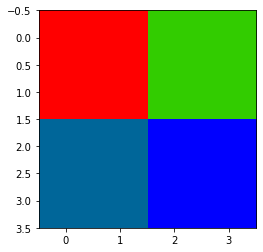

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [8]:
## test ##
plt.rcParams['figure.figsize'] = [4, 4]
plt.imshow(image_sq, cmap=cmap)
plt.show()
print(image_sq)

<function matplotlib.pyplot.show(close=None, block=None)>

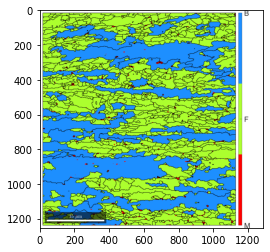

In [9]:
from PIL import Image

del sq, sq_df, image_sq

im = Image.open('Phase map.tif')
plt.imshow(im)
plt.show

In [10]:
image_matrix = make_image(int(data_to_show['Y'].max() *10), int(data_to_show['X'].max() *10), \
                           data_to_show['Phase'].values)

550 500


In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

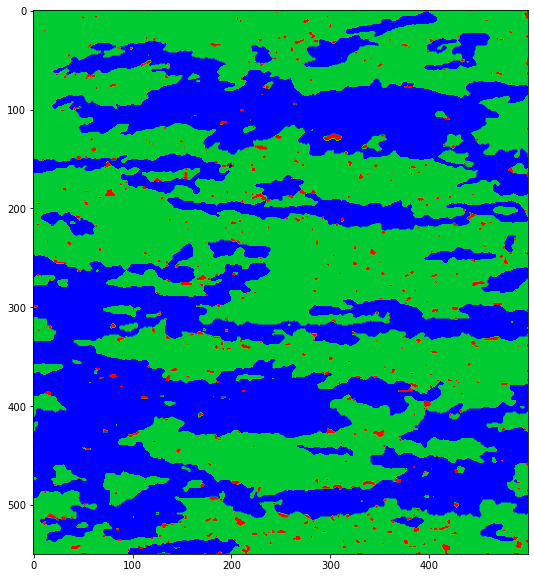

In [12]:
plt.imshow(image_matrix, cmap=cmap)
plt.show()

In [13]:
def display_grain_on_image(input_tab, grains, grain_number):
    output_tab = np.copy(input_tab)
    
    print(input_tab.shape[0], input_tab.shape[1])
    
    for i in range((input_tab.shape[0]) * (input_tab.shape[1]) - grains.shape[0]):
        grains = np.concatenate((grains, [grains[-1]]))
    
    for i in range(input_tab.shape[0]):
        for j in range(input_tab.shape[1]):
            
            if(grains[i * input_tab.shape[1] + j] == grain_number):
                output_tab[i][j] = 0
    
    return output_tab

In [14]:
grain_image_matrix = display_grain_on_image(image_matrix, data_to_show['grainId_5deg'].values, 50)

550 500


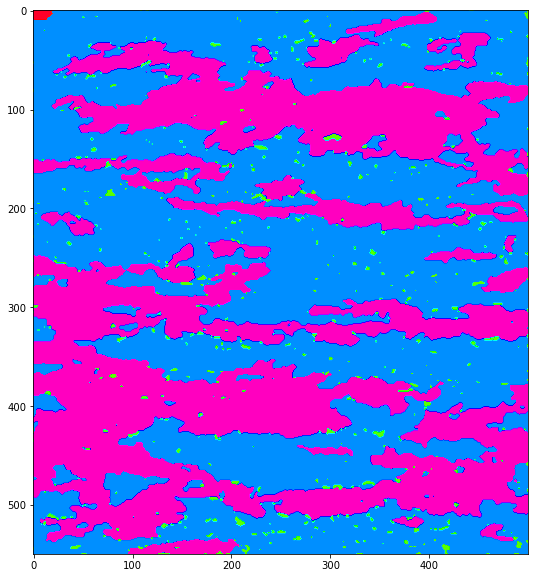

In [15]:
plt.imshow(grain_image_matrix, cmap=cm.get_cmap('gist_rainbow'))
plt.show()

In [16]:
def image_binarization_by_phase(row_range, col_range, values, phase):
    image_tab = np.zeros((row_range+1, col_range+1))
    
    print(row_range+1, col_range+1)
    
    for i in range((row_range+1) * (col_range+1) - values.shape[0]):
        values = np.concatenate((values, [values[-1]]))
    
    
    for i in range(row_range+1):
        for j in range(col_range+1):
            
            if(values[i * (col_range+1) + j] == phase):
                image_tab[i][j] = 1
            else:
                image_tab[i][j] = 0
    
    return image_tab

In [17]:
phase_image_matrix = image_binarization_by_phase(int(data_to_show['Y'].max()*10), int(data_to_show['X'].max()*10),\
                                                  data_to_show['Phase'].values, 3)

550 500


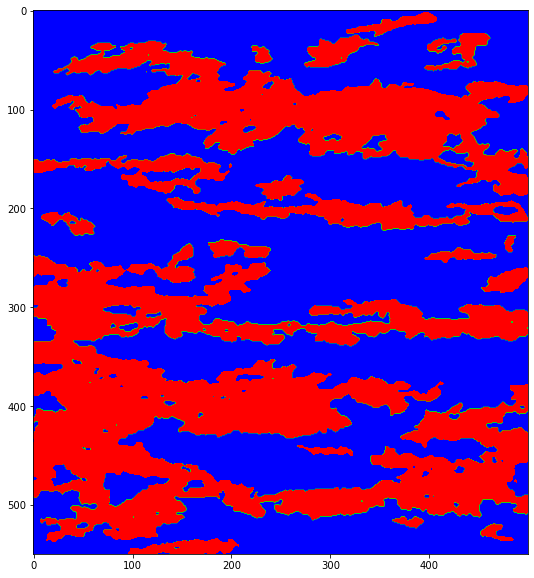

In [18]:
plt.imshow(phase_image_matrix, cmap=cmap.reversed())
plt.show()

In [19]:
def image_color_segmentation(input_tab, grains):
        output_tab = np.copy(input_tab)
        
        for i in range((input_tab.shape[0]+1) * (input_tab.shape[1]+1) - grains.shape[0]):
            grains = np.concatenate((grains, [grains[-1]]))
        
        
        for i in range(input_tab.shape[0]):
            for j in range(input_tab.shape[1]):
                output_tab[i][j] = np.remainder(grains[i * input_tab.shape[1] + j], 255)
        
        return output_tab / 255. #np.mod(grains, 255)/ 255.

In [20]:
segmentation_image_matrix = image_color_segmentation(image_matrix, data_to_show['grainId_5deg'].values)
segmentation_image_matrix = np.uint8(cm.gist_ncar(segmentation_image_matrix) *255)

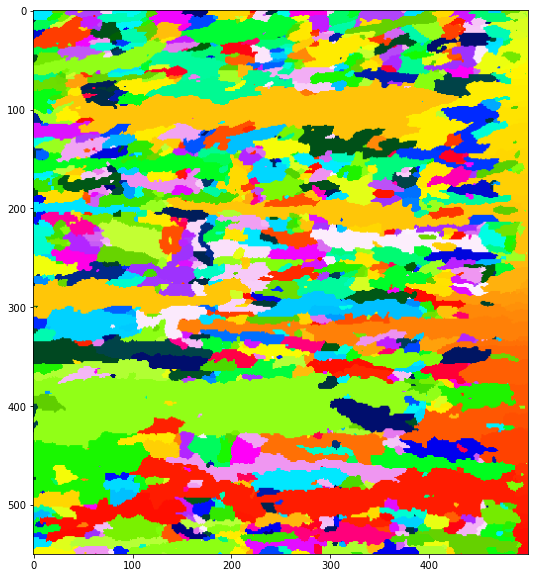

In [21]:
plt.imshow(segmentation_image_matrix)
plt.show()

In [22]:
del grain_image_matrix, phase_image_matrix, segmentation_image_matrix

In [23]:
grain1714 = data_to_show[data_to_show.grainId_5deg == 1714] # Phase: 3
pd.unique(grain1714.Phase)

array([3, 2, 1])

In [24]:
grain1387 = data_to_show[data_to_show.grainId_5deg == 1387] # Phase: 3
grain1686 = data_to_show[data_to_show.grainId_5deg == 1686] # Phase: 3

print(pd.unique(grain1387.Phase), pd.unique(grain1686.Phase))

[2 1 3] [2 1 3]


In [25]:
grains_df = pd.DataFrame({"Area": data_to_show['grainId_5deg'].value_counts()})

grains_df['Phase'] = list(map( lambda x: data_to_show.loc[data_to_show.grainId_5deg == x, \
                                    'Phase'].value_counts(sort=True).index[0],  grains_df.index))

print(grains_df.Phase.value_counts())
grains_df.head(20)

2    1252
1     370
3      97
Name: Phase, dtype: int64


,Area,Phase
1387,18906,3
1432,12662,3
1714,11278,3
1686,5275,3
1698,5234,3
338,4959,3
666,4688,3
1703,3123,3
1670,2814,3
1254,2792,2


In [26]:
def get_phase_area(x, phase):
    result_sum = sum(x[x.Phase == phase]['Phase'].tolist())
    return result_sum


phase_1_area = get_phase_area(df, 1)
phase_2_area = get_phase_area(df, 2)
phase_3_area = get_phase_area(df, 3)

del df
print('Sum of areas occupied by phases (1,2,3):', phase_1_area, phase_2_area, phase_3_area)

Sum of areas occupied by phases (1,2,3): 4168 316118 338316


In [27]:
print("Grains amount before:", grains_df.shape[0])

def remove_border_grains(df, data):
    ### Code for deletion of border grains. ###
    
    border_limit_x = int(data['X'].max() *10)
    border_limit_y = int(data['Y'].max() *10)
    
    for i in [0, border_limit_x]:
        for j in range(border_limit_y):
            
            gr_num = data.loc[(data['X'] == i/10) & (data['Y'] == j/10), 'grainId_5deg'].values[0]
            
            if gr_num in set(df.index):
                df.drop(gr_num, inplace=True)
                
    for i in range(border_limit_x):
        for j in [0, border_limit_y]:
            
            gr_num = data.loc[(data['X'] == i/10) & (data['Y'] == j/10), 'grainId_5deg'].values[0]
            
            if gr_num in set(df.index):
                df.drop(gr_num, inplace=True)
                
    print("Grains amount after:", df.shape[0])
    
    return df

grains_df = remove_border_grains(grains_df, data_to_show)

Grains amount before: 1719
Grains amount after: 1542


Text(0.5, 1.0, 'Pareto distribution')

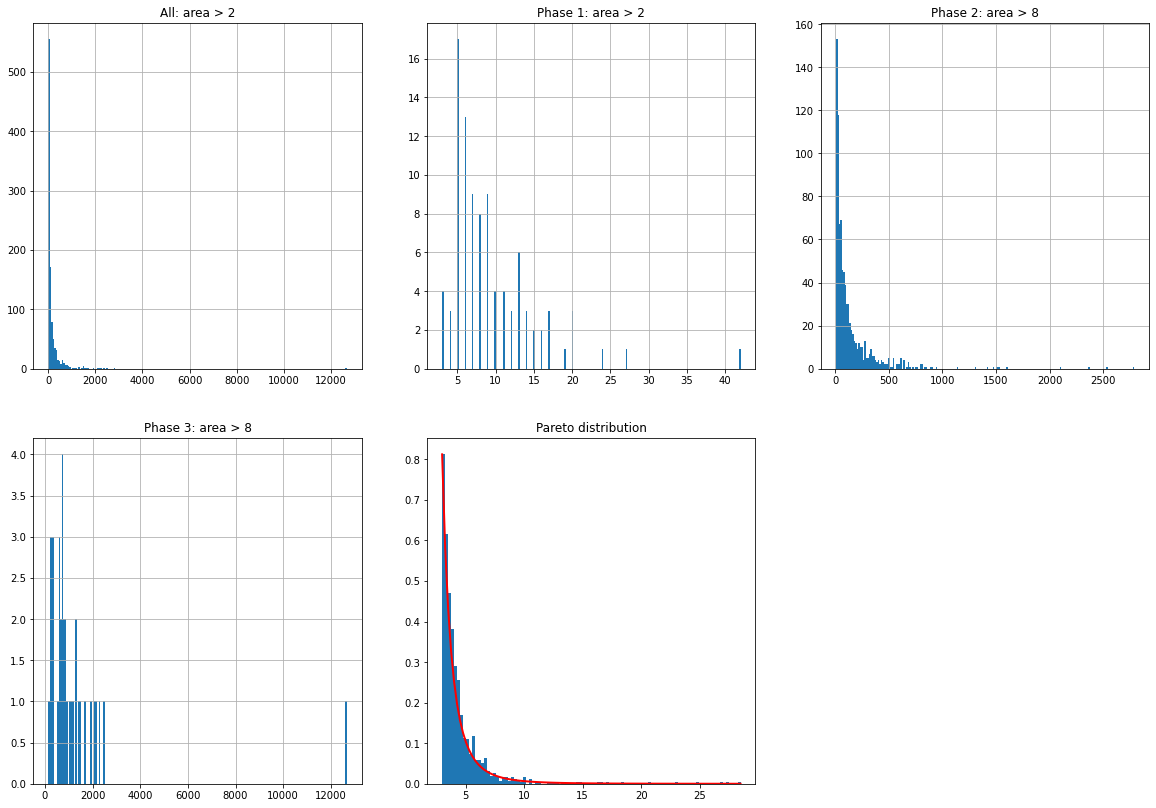

In [28]:
plt.rcParams['figure.figsize'] = [20, 14]
fig = plt.figure()

fig.add_subplot(231)
grains_df.loc[grains_df['Area'] > 2]['Area'].hist(bins=200)
plt.title('All: area > 2')

fig.add_subplot(232)
grains_df.loc[(grains_df['Phase'] == 1) & (grains_df['Area'] > 2)]['Area'].hist(bins=200)
plt.title('Phase 1: area > 2')

fig.add_subplot(233)
grains_df.loc[(grains_df['Phase'] == 2) & (grains_df['Area'] >= 8)]['Area'].hist(bins=200)
plt.title('Phase 2: area > 8')


fig.add_subplot(234)
grains_df.loc[(grains_df['Phase'] == 3) & (grains_df['Area'] >= 8)]['Area'].hist(bins=200)
plt.title('Phase 3: area > 8')

fig.add_subplot(235)
a, m = 3., 3.
s = (np.random.pareto(a, 1000) + 1) * m

count, bins, _ = plt.hist(s, 100, density=True)
fit = a * m**a / bins **(a+1)
plt.plot(bins, max(count)*fit / max(fit), linewidth=2, color='r')
plt.title('Pareto distribution')

In [29]:
import cv2
from scipy import ndimage
from skimage import measure

struct = np.ones((3,3))
                 
def measure_regionprops(mask, img):
    labeled_mask, _ = ndimage.label(mask, structure=struct)
    clusters = measure.regionprops(labeled_mask, img)
    return clusters

In [30]:
grains = data_to_show['grainId_5deg'].values


for i in range((image_matrix.shape[0]) * (image_matrix.shape[1]) - grains.shape[0]):
    grains = np.concatenate((grains, [grains[-1]]))

tmp = grains.reshape(image_matrix.shape)
perimeter = []; major_axis = []; minor_axis = []; eccentricity = []; equivalent_diameter = []
X = [];  Y = []; bbox = []; orientation = []



for i in grains_df.index:
    
    mask = tmp == i
    clusters = measure_regionprops(mask, tmp)
    
    perimeter.append(clusters[0].perimeter)
    Y.append(clusters[0].centroid[0])
    X.append(clusters[0].centroid[1])
    major_axis.append(clusters[0].major_axis_length)
    minor_axis.append(clusters[0].minor_axis_length)
    eccentricity.append(clusters[0].eccentricity)
    equivalent_diameter.append(clusters[0].equivalent_diameter)
    bbox.append(clusters[0].bbox)
    orientation.append(clusters[0].orientation)


bbox = np.array(bbox)
grains_df['Perimeter'] = perimeter
grains_df['y'] = Y
grains_df['x'] = X
grains_df['orientation'] = orientation
grains_df['Major axis']  = major_axis
grains_df['Minor axis']  = minor_axis

In [31]:
class ShapeCoeffsStored:
    
    def __init__(self, area, perimeter, Y, X, major_axis, minor_axis,\
                    eccentricity, equivalent_diameter, bbox, orientation, indices, image):
        self.area = area
        self.perimeter = perimeter
        self.y = Y
        self.x = X
        self.major_axis = major_axis
        self.minor_axis = minor_axis
        self.eccentricity = eccentricity
        self.equivalent_diameter = equivalent_diameter
        self.bbox = bbox
        self.orientation = orientation
        self.indices = indices
        self.image = image

In [32]:
params = [np.array(i) for i in [perimeter, Y, X, major_axis, \
                            minor_axis, eccentricity, equivalent_diameter, bbox, orientation]]

coeffs_obj = ShapeCoeffsStored(grains_df['Area'].to_numpy(), *params, grains_df.index, tmp)

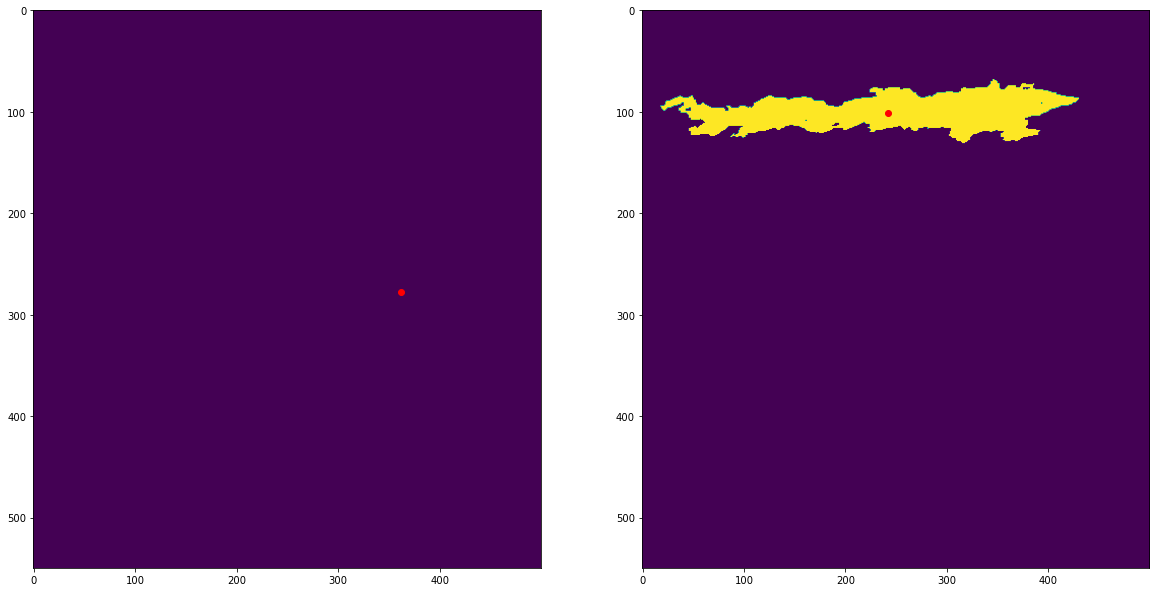

In [33]:
fig = plt.figure()

fig.add_subplot(121)
mask = tmp == 1200
plt.imshow(mask)
plt.plot(grains_df['x'].loc[1200], grains_df['y'].loc[1200], 'ro')

fig.add_subplot(122)
mask = tmp == 1432
plt.imshow(mask)
plt.plot(grains_df['x'].loc[1432], grains_df['y'].loc[1432], 'ro')

plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

In [34]:
### Shape coefficients functions ###

def Zeta1(x):
    return 2 * (x.major_axis + x.minor_axis) / x.perimeter

def Zeta2(x):
    return x.perimeter / (4 * np.sqrt(x.area))

def Zeta3(x): # mimośród
    return x.eccentricity

def Zeta4(x):
    return x.perimeter / np.pi

def Zeta5(x):
    return x.equivalent_diameter

def Zeta6(x): # Malinowska
    return 2 * np.sqrt(np.pi * x.area) / x.perimeter

def Zeta7(x): # Feret
    return (x.bbox[:,3] - x.bbox[:,1]) / (x.bbox[:,2] - x.bbox[:,0])

def Zeta8(x, data): # Blair-Bliss
    x_iter = iter(x.x)
    y_iter = iter(x.y)
    tmp_array = list(map( lambda i: np.power(np.sqrt( \
                np.power( next(x_iter) - data.loc[data['grainId_5deg']==i]['X'] *10, 2).tolist() + \
                np.power( next(y_iter) - data.loc[data['grainId_5deg']==i]['Y'] *10, 2).tolist()), 2) ,\
                x.indices))
    return x.area / np.sqrt(2 * np.pi * np.array([np.sum(i) for i in tmp_array]))

def get_contours(x):
    return_list = list(map(lambda i: cv2.findContours(\
                            np.uint8(cv2.threshold(np.uint8( x.image == i ), 0, 1, cv2.THRESH_BINARY)[1]), \
                            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0], \
                            x.indices))
    return_list = np.squeeze(np.array(return_list))
    
    if isinstance(return_list[0][0], (list, np.ndarray)):
        return np.array([np.array([i[0] for i in lst]) for lst in return_list])
    if isinstance(return_list[0][0], int):
        return np.array([[np.array([i for i in lst]) for lst in return_list]])
    else:
        return np.array([return_list])

def Zeta9(x): # Haralick
    contours = get_contours(x)
    n = iter([i.shape[0] for i in contours])
    
    if np.any(np.array(n) == 0):
        return None
    
    x_iter, y_iter = iter(x.x), iter(x.y)
    numerator = np.array([ np.power( np.sum( \
                        np.sqrt(np.power(next(x_iter) - i[:,0], 2) + np.power(next(y_iter) - i[:,1], 2))), 2) \
                        for i in contours])
    
    x_iter, y_iter = iter(x.x), iter(x.y)
    denominator = np.array([( next(n) * np.sum( np.power(\
                        np.sqrt(np.power(next(x_iter) - i[:,0], 2) + np.power(next(y_iter) - i[:,1], 2)), 2))) - 1\
                        for i in contours])
    
    return np.sqrt(np.divide(numerator, denominator, out=np.ones_like(numerator), where=denominator!=0))

def get_distances(x, contours):
    x_iter, y_iter = iter(x.x), iter(x.y)
    return np.array([np.sqrt(np.power(next(x_iter) - i[:,0], 2) + np.power(next(y_iter) - i[:,1], 2)) \
                        for i in contours])

def Zeta10(x):
    contours = get_contours(x)
    
    dists = get_distances(x, contours)
    
    return np.array([np.min(i) for i in dists]) / np.array([np.max(i) for i in dists])

def Zeta11(x):
    return x.major_axis / x.perimeter

def Zeta12(x, data): # Danielsson
    contours = get_contours(x)
    
    min_list = [np.min(np.sqrt(\
                np.power(contours[i][:,0,None] - (data.loc[data['grainId_5deg']==elem]['X']*10).tolist(), 2) + \
                np.power(contours[i][:,1,None] - (data.loc[data['grainId_5deg']==elem]['Y']*10).tolist(), 2)), \
                axis=0) for i, elem in enumerate(x.indices)]
    
    return np.power(x.area, 3) / np.power(np.array([np.sum(i) for i in min_list]), 2)

In [35]:
function_dict = {
    'Zeta1': Zeta1,
    'Zeta2': Zeta2,
    'Zeta3': Zeta3, # eccentricity
    'Zeta4': Zeta4,
    'Zeta5': Zeta5,
    'Zeta6': Zeta6, # Malinowska
    'Zeta7': Zeta7, # Feret
    'Zeta8': Zeta8, # Blair-Bliss
    'Zeta9': Zeta9, # Harlick
    'Zeta10': Zeta10,
    'Zeta11': Zeta11,
    'Zeta12': Zeta12 # Danielsson
}

In [36]:
grains_df['Zeta1'] = Zeta1(coeffs_obj)
grains_df['Zeta2'] = Zeta2(coeffs_obj)
grains_df['Zeta3'] = Zeta3(coeffs_obj)
grains_df['Zeta4'] = Zeta4(coeffs_obj)
grains_df['Zeta5'] = Zeta5(coeffs_obj)
grains_df['Zeta6'] = Zeta6(coeffs_obj)
grains_df['Zeta7'] = Zeta7(coeffs_obj)
grains_df['Zeta8'] = Zeta8(coeffs_obj, data_to_show)
grains_df['Zeta9'] = Zeta9(coeffs_obj)
grains_df['Zeta10'] = Zeta10(coeffs_obj)
grains_df['Zeta11'] = Zeta11(coeffs_obj)
#grains_df['Zeta12'] = Zeta12(coeffs_obj, data_to_show)

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/939598480.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return 2 * (x.major_axis + x.minor_axis) / x.perimeter
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/939598480.py:4: RuntimeWarning: invalid value encountered in true_divide
  return 2 * (x.major_axis + x.minor_axis) / x.perimeter
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/939598480.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return 2 * np.sqrt(np.pi * x.area) / x.perimeter
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/939598480.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return x.area / np.sqrt(2 * np.pi * np.array([np.sum(i) for i in tmp_array]))
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/939598480.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

In [37]:
grains_df

,Area,Phase,Perimeter,y,x,orientation,Major axis,Minor axis,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
1432,12662,3,1241.146320,100.931290,241.879798,-1.547004,423.966014,46.677344,0.758401,2.757477,0.993921,395.069144,126.971489,0.321391,6.539683,0.420992,0.883657,0.066849,0.341592
1254,2792,2,627.274170,462.316619,260.701648,1.536247,265.234974,23.416116,0.920335,2.967835,0.996095,199.667570,59.622855,0.298611,7.625000,0.316673,0.874739,0.013457,0.422837
1190,2532,2,503.747258,441.176935,294.024092,1.563784,144.793562,31.359833,0.699372,2.502769,0.976264,160.347732,56.778892,0.354099,3.909091,0.541999,0.868288,0.012447,0.287433
442,2500,3,453.640656,507.813600,89.615600,-1.484187,156.051404,28.479141,0.813554,2.268203,0.983206,144.398306,56.418958,0.390718,3.794872,0.502988,0.892367,0.024080,0.343998
1528,2366,2,543.605122,232.713863,361.585799,1.528908,198.432480,20.412451,0.805161,2.793934,0.994695,173.034885,54.886107,0.317197,6.428571,0.389116,0.873286,0.054069,0.365031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,1,2,0.000000,18.000000,15.000000,0.785398,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.128379,inf,1.000000,inf,-0.000000,NaN,NaN
288,1,1,0.000000,38.000000,99.000000,0.785398,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.128379,inf,1.000000,inf,-0.000000,NaN,NaN
630,1,3,0.000000,261.000000,210.000000,0.785398,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.128379,inf,1.000000,inf,-0.000000,NaN,NaN
886,1,1,0.000000,518.000000,275.000000,0.785398,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.128379,inf,1.000000,inf,-0.000000,NaN,NaN


In [38]:
del data_to_show, grains, tmp
del perimeter, major_axis, minor_axis, eccentricity, equivalent_diameter
del X,  Y, bbox, orientation

In [39]:
#grains_df = grains_df.loc[grains_df['Area'] > 2]
print(grains_df.shape)
grains_df.head(20)

(1542, 19)


,Area,Phase,Perimeter,y,x,orientation,Major axis,Minor axis,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
1432,12662,3,1241.146320,100.931290,241.879798,-1.547004,423.966014,46.677344,0.758401,2.757477,0.993921,395.069144,126.971489,0.321391,6.539683,0.420992,0.883657,0.066849,0.341592
1254,2792,2,627.274170,462.316619,260.701648,1.536247,265.234974,23.416116,0.920335,2.967835,0.996095,199.667570,59.622855,0.298611,7.625000,0.316673,0.874739,0.013457,0.422837
1190,2532,2,503.747258,441.176935,294.024092,1.563784,144.793562,31.359833,0.699372,2.502769,0.976264,160.347732,56.778892,0.354099,3.909091,0.541999,0.868288,0.012447,0.287433
442,2500,3,453.640656,507.813600,89.615600,-1.484187,156.051404,28.479141,0.813554,2.268203,0.983206,144.398306,56.418958,0.390718,3.794872,0.502988,0.892367,0.024080,0.343998
1528,2366,2,543.605122,232.713863,361.585799,1.528908,198.432480,20.412451,0.805161,2.793934,0.994695,173.034885,54.886107,0.317197,6.428571,0.389116,0.873286,0.054069,0.365031
300,2272,3,319.415260,317.430898,55.647447,1.542140,94.774493,33.481625,0.803068,1.675296,0.935519,101.673035,53.784758,0.528997,2.540541,0.756736,0.943682,0.204614,0.296712
833,2165,3,445.427453,78.098845,189.952425,-1.482902,143.125879,25.952032,0.759171,2.393250,0.983424,141.783962,52.502987,0.370303,4.166667,0.510454,0.881249,0.041618,0.321323
1286,2104,3,427.220346,133.568441,319.394962,1.497717,123.696510,30.975551,0.724086,2.328462,0.968138,135.988460,51.758053,0.380606,3.428571,0.574022,0.901176,0.038428,0.289538
842,2099,2,291.308658,20.097666,210.457837,-1.465088,116.988306,24.220248,0.969477,1.589598,0.978334,92.726426,51.696516,0.557517,3.687500,0.611956,0.902937,0.122341,0.401596
1609,1946,3,374.172619,458.945529,411.483556,1.470454,168.464424,18.696873,1.000401,2.120511,0.993822,119.102844,49.776743,0.417931,4.055556,0.415312,0.877382,0.041406,0.450232


In [40]:
df = grains_df[['Zeta1', 'Zeta2', 'Zeta3', 'Zeta4', 'Zeta5', \
                'Zeta6', 'Zeta7', 'Zeta8', 'Zeta9', 'Zeta10', 'Zeta11']]
df.drop(df[np.isnan(df['Zeta1'])].index, inplace=True)
df

/Users/krzysiu/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
1432,0.758401,2.757477,0.993921,395.069144,126.971489,0.321391,6.539683,0.420992,0.883657,0.066849,0.341592
1254,0.920335,2.967835,0.996095,199.667570,59.622855,0.298611,7.625000,0.316673,0.874739,0.013457,0.422837
1190,0.699372,2.502769,0.976264,160.347732,56.778892,0.354099,3.909091,0.541999,0.868288,0.012447,0.287433
442,0.813554,2.268203,0.983206,144.398306,56.418958,0.390718,3.794872,0.502988,0.892367,0.024080,0.343998
1528,0.805161,2.793934,0.994695,173.034885,54.886107,0.317197,6.428571,0.389116,0.873286,0.054069,0.365031
...,...,...,...,...,...,...,...,...,...,...,...
1232,inf,0.000000,1.000000,0.000000,1.595769,inf,2.000000,1.128379,1.000000,1.000000,inf
941,inf,0.000000,1.000000,0.000000,1.595769,inf,2.000000,1.128379,1.000000,1.000000,inf
622,inf,0.000000,1.000000,0.000000,1.595769,inf,0.500000,1.128379,1.000000,1.000000,inf
275,inf,0.000000,1.000000,0.000000,1.595769,inf,2.000000,1.128379,1.000000,1.000000,inf


In [41]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.describe()

/Users/krzysiu/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/2367779004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,1.326233,1.074324,0.850131,17.074914,11.320448,0.926905,1.888245,0.815045,0.943250,0.275468,0.455217
std,0.437472,0.361920,0.129870,23.743353,9.701593,0.413007,0.981607,0.138094,0.034584,0.154259,0.193156
min,0.682899,0.144338,0.000000,0.318310,1.954410,0.298611,0.375000,0.316673,0.755929,0.000000,0.191007
25%,1.105628,0.840570,0.793724,4.785959,4.918491,0.713932,1.218254,0.730045,0.918588,0.155780,0.379273
50%,1.234338,1.027707,0.885491,10.285773,8.667245,0.862334,1.666667,0.841938,0.945589,0.265869,0.426128
75%,1.445588,1.241332,0.943224,19.896309,14.250656,1.054317,2.333333,0.921318,0.967863,0.375685,0.483953
max,6.531973,2.967835,1.000000,395.069144,126.971489,6.139960,7.625000,1.128379,1.132828,1.000000,3.265986


In [42]:
df['Phase'] = list( map(lambda x: grains_df.loc[grains_df.index == x, 'Phase'].values[0], df.index))

df.Phase.value_counts()

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/426297573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phase'] = list( map(lambda x: grains_df.loc[grains_df.index == x, 'Phase'].values[0], df.index))


2    895
1     97
3     39
Name: Phase, dtype: int64

In [43]:
df

,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11,Phase
1432,0.758401,2.757477,0.993921,395.069144,126.971489,0.321391,6.539683,0.420992,0.883657,0.066849,0.341592,3
1254,0.920335,2.967835,0.996095,199.667570,59.622855,0.298611,7.625000,0.316673,0.874739,0.013457,0.422837,2
1190,0.699372,2.502769,0.976264,160.347732,56.778892,0.354099,3.909091,0.541999,0.868288,0.012447,0.287433,2
442,0.813554,2.268203,0.983206,144.398306,56.418958,0.390718,3.794872,0.502988,0.892367,0.024080,0.343998,3
1528,0.805161,2.793934,0.994695,173.034885,54.886107,0.317197,6.428571,0.389116,0.873286,0.054069,0.365031,2
...,...,...,...,...,...,...,...,...,...,...,...,...
443,2.133864,0.492799,0.816497,1.086778,1.954410,1.798353,1.000000,1.036482,1.132828,0.632456,0.676408,1
981,6.531973,0.144338,1.000000,0.318310,1.954410,6.139960,3.000000,0.846284,0.755929,0.000000,3.265986,1
879,2.133864,0.492799,0.816497,1.086778,1.954410,1.798353,1.000000,1.036482,1.132828,0.632456,0.676408,1
18,2.133864,0.492799,0.816497,1.086778,1.954410,1.798353,1.000000,1.036482,1.132828,0.632456,0.676408,1


In [44]:
def get_mean_phase_area(x, y, phase):
    phase_in_x = x.loc[x.Phase == phase].index
    result_sum = sum(list(map(lambda i: y[y.index == i].Area.values, phase_in_x)))[0]
    return result_sum / len(phase_in_x), result_sum

phase_1_mean_area, phase_1_area_after = get_mean_phase_area(df, grains_df, 1)
phase_2_mean_area, phase_2_area_after = get_mean_phase_area(df, grains_df, 2)
phase_3_mean_area, phase_3_area_after = get_mean_phase_area(df, grains_df, 3)

print('Mean: Phase 1:', phase_1_mean_area, 'Phase 2:', phase_2_mean_area, 'Phase 3:', phase_3_mean_area)

Mean: Phase 1: 9.484536082474227 Phase 2: 146.527374301676 Phase 3: 1226.8974358974358


In [45]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 10]
plt.style.use('ggplot')

In [46]:
def createKMean(T, n_clusters):
    model = KMeans(n_clusters=n_clusters)
    model.fit(T)

    print(model.cluster_centers_, '\n\n', model.labels_)
    
    return model

def makePCA(n_dims, T, kmeans):
    model = PCA(n_components=n_dims, svd_solver='randomized', random_state=7)
    model.fit(T)
    
    T  = model.transform(T)
    CC = model.transform(kmeans.cluster_centers_)
    
    return T, CC

def display3d(T, CC, model):
    c = ['red', 'green', 'blue', 'purple', 'orange']
    
    fig = plt.figure()
    
    ax  = fig.add_subplot(projection='3d')
    ax.set_title('KMeans')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    sample_colors = [ c[model.labels_[i]] for i in range(len(T)) ]
    ax.scatter(T[:, 0], T[:, 1], T[:, 2], c=sample_colors, marker='o', alpha=0.2)
    ax.scatter(CC[:, 0], CC[:, 1], CC[:, 2], marker='.', s=169, linewidths=3, zorder=1000, c='black')

    for i in range(len(model.cluster_centers_)):
        ax.text(CC[i, 0], CC[i, 1], CC[i, 2], str(i), fontsize=16, color=c[i])
    
    plt.show()

In [47]:
corr = df.loc[df['Phase'] == 1, df.columns != 'Phase'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
Zeta1,1.00,-0.75,0.16,-0.51,-0.47,0.96,0.33,-0.17,-0.37,-0.19,0.96
Zeta2,-0.75,1.00,0.14,0.92,0.87,-0.77,-0.01,-0.37,-0.11,-0.19,-0.59
Zeta3,0.16,0.14,1.00,0.17,0.14,0.08,0.46,-0.62,-0.51,-0.66,0.32
Zeta4,-0.51,0.92,0.17,1.00,0.97,-0.55,0.07,-0.47,-0.21,-0.24,-0.36
Zeta5,-0.47,0.87,0.14,0.97,1.00,-0.52,0.08,-0.45,-0.24,-0.23,-0.32
Zeta6,0.96,-0.77,0.08,-0.55,-0.52,1.00,0.28,0.02,-0.27,-0.07,0.94
Zeta7,0.33,-0.01,0.46,0.07,0.08,0.28,1.00,-0.50,-0.48,-0.33,0.48
Zeta8,-0.17,-0.37,-0.62,-0.47,-0.45,0.02,-0.50,1.00,0.71,0.72,-0.31
Zeta9,-0.37,-0.11,-0.51,-0.21,-0.24,-0.27,-0.48,0.71,1.00,0.78,-0.49
Zeta10,-0.19,-0.19,-0.66,-0.24,-0.23,-0.07,-0.33,0.72,0.78,1.00,-0.29


In [48]:
"""
    for Phase 1  austenite
"""
scaler = Normalizer
coeffs_1 = ['Zeta1','Zeta6','Zeta11']
T = scaler().fit_transform( df.loc[df['Phase'] == 1, df.columns.isin(coeffs_1)] )
T

array([[0.81132482, 0.518235  , 0.27052637],
       [0.79863375, 0.52299211, 0.29776398],
       [0.80902473, 0.50207731, 0.30560982],
       [0.7843729 , 0.5532543 , 0.28047964],
       [0.78369214, 0.55545385, 0.27802455],
       [0.83546169, 0.42866268, 0.34387798],
       [0.77642683, 0.58835654, 0.22582727],
       [0.77061111, 0.59825656, 0.21965337],
       [0.82274033, 0.45850928, 0.33595772],
       [0.77335933, 0.59625109, 0.21540657],
       [0.77711737, 0.57834155, 0.2482129 ],
       [0.82006847, 0.46403414, 0.334903  ],
       [0.78278402, 0.57267729, 0.24349518],
       [0.76655064, 0.60866356, 0.20476518],
       [0.76790755, 0.59250449, 0.24342641],
       [0.78475824, 0.55923951, 0.26721842],
       [0.76790755, 0.59250449, 0.24342641],
       [0.77352415, 0.59522345, 0.21764521],
       [0.77276902, 0.58222096, 0.25267923],
       [0.78207281, 0.56105155, 0.27126239],
       [0.77118863, 0.59411865, 0.22867253],
       [0.77173934, 0.58296355, 0.25410999],
       [0.

In [49]:
clusters = 1
dims = 3

model_1 = createKMean(T, clusters)

T, CC = makePCA(dims, T, model_1)

[[0.77141097 0.58230427 0.25078213]] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


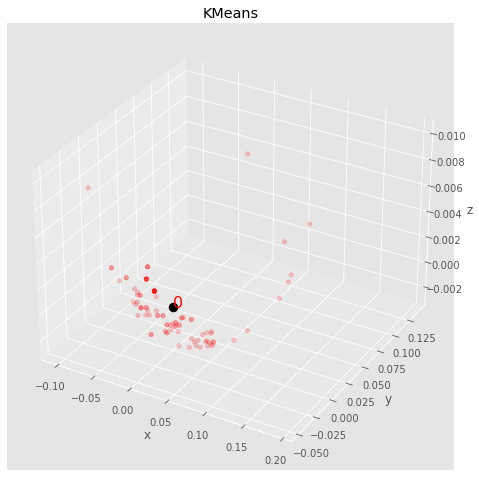

In [50]:
display3d(T, CC, model_1)

In [51]:
corr = df.loc[df['Phase'] == 2, df.columns != 'Phase'].corr()
corr.style.background_gradient(cmap='PiYG').set_precision(2)

,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
Zeta1,1.00,-0.67,-0.14,-0.48,-0.56,0.96,-0.22,0.31,-0.03,0.17,0.91
Zeta2,-0.67,1.00,0.46,0.86,0.84,-0.73,0.67,-0.79,-0.54,-0.59,-0.37
Zeta3,-0.14,0.46,1.00,0.32,0.31,-0.29,0.58,-0.75,-0.78,-0.78,0.20
Zeta4,-0.48,0.86,0.32,1.00,0.95,-0.51,0.60,-0.59,-0.39,-0.40,-0.25
Zeta5,-0.56,0.84,0.31,0.95,1.00,-0.56,0.53,-0.53,-0.32,-0.36,-0.32
Zeta6,0.96,-0.73,-0.29,-0.51,-0.56,1.00,-0.35,0.50,0.16,0.34,0.83
Zeta7,-0.22,0.67,0.58,0.60,0.53,-0.35,1.00,-0.80,-0.70,-0.59,0.09
Zeta8,0.31,-0.79,-0.75,-0.59,-0.53,0.50,-0.80,1.00,0.89,0.85,-0.05
Zeta9,-0.03,-0.54,-0.78,-0.39,-0.32,0.16,-0.70,0.89,1.00,0.89,-0.39
Zeta10,0.17,-0.59,-0.78,-0.40,-0.36,0.34,-0.59,0.85,0.89,1.00,-0.16


In [52]:
"""
    for Phase 2  martensite
"""
coeffs_2 = ['Zeta1','Zeta6','Zeta11']
T = scaler().fit_transform( df.loc[df['Phase'] == 2, df.columns.isin(coeffs_2)] )
T

array([[0.87159171, 0.28279553, 0.40044298],
       [0.83763159, 0.42410053, 0.34425581],
       [0.85726031, 0.33772136, 0.38865028],
       ...,
       [0.68461475, 0.64352801, 0.34230738],
       [0.68461475, 0.64352801, 0.34230738],
       [0.74314247, 0.62629672, 0.23556672]])

In [53]:
clusters = 1
dims = 3

model_2 = createKMean(T, clusters)

T, CC = makePCA(dims, T, model_2)

[[0.79263921 0.54057286 0.27367464]] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

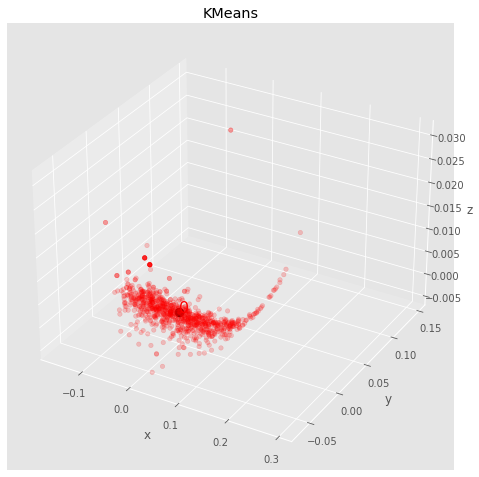

In [54]:
display3d(T, CC, model_2)

In [55]:
corr = df.loc[df['Phase'] == 3, df.columns != 'Phase'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
Zeta1,1.00,-0.55,0.26,-0.56,-0.61,0.54,0.09,-0.13,-0.12,0.11,0.81
Zeta2,-0.55,1.00,0.29,0.77,0.71,-0.97,0.62,-0.71,-0.63,-0.64,-0.04
Zeta3,0.26,0.29,1.00,0.16,0.14,-0.35,0.65,-0.71,-0.65,-0.34,0.69
Zeta4,-0.56,0.77,0.16,1.00,0.98,-0.65,0.50,-0.38,-0.25,-0.25,-0.20
Zeta5,-0.61,0.71,0.14,0.98,1.00,-0.60,0.42,-0.29,-0.15,-0.17,-0.26
Zeta6,0.54,-0.97,-0.35,-0.65,-0.60,1.00,-0.60,0.75,0.71,0.72,0.00
Zeta7,0.09,0.62,0.65,0.50,0.42,-0.60,1.00,-0.83,-0.73,-0.44,0.57
Zeta8,-0.13,-0.71,-0.71,-0.38,-0.29,0.75,-0.83,1.00,0.93,0.73,-0.65
Zeta9,-0.12,-0.63,-0.65,-0.25,-0.15,0.71,-0.73,0.93,1.00,0.84,-0.58
Zeta10,0.11,-0.64,-0.34,-0.25,-0.17,0.72,-0.44,0.73,0.84,1.00,-0.27


In [56]:
"""
    for Phase 3  ferrite
"""
coeffs_3 = ['Zeta8','Zeta9','Zeta10']
T = scaler().fit_transform( df.loc[df['Phase'] == 3, df.columns.isin(coeffs_3)] )
T

array([[0.42910316, 0.90068184, 0.06813734],
       [0.4908909 , 0.87090404, 0.02350054],
       [0.61683424, 0.76921904, 0.16678607],
       [0.50080711, 0.86459532, 0.04083114],
       [0.5368922 , 0.84288487, 0.03594242],
       [0.42745385, 0.90303214, 0.04261638],
       [0.52507212, 0.84880803, 0.06183999],
       [0.63074863, 0.77569973, 0.0211211 ],
       [0.48008282, 0.87347358, 0.08102097],
       [0.62585914, 0.76890722, 0.1306982 ],
       [0.59910204, 0.79105007, 0.12376001],
       [0.59283418, 0.79660599, 0.1181801 ],
       [0.58651004, 0.80586824, 0.08113173],
       [0.63912751, 0.7292822 , 0.24426115],
       [0.39958315, 0.91551788, 0.04647921],
       [0.50073526, 0.86300925, 0.06692707],
       [0.45940578, 0.88661001, 0.05356316],
       [0.48845924, 0.87162132, 0.04103459],
       [0.57733861, 0.81459355, 0.05583447],
       [0.54571548, 0.83513746, 0.06884789],
       [0.55376914, 0.83249897, 0.01688816],
       [0.46531013, 0.88375287, 0.04967241],
       [0.

In [57]:
clusters = 1
dims = 3

model_3 = createKMean(T, clusters)

T, CC = makePCA(dims, T, model_3)

[[0.54704311 0.82645228 0.0840592 ]] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


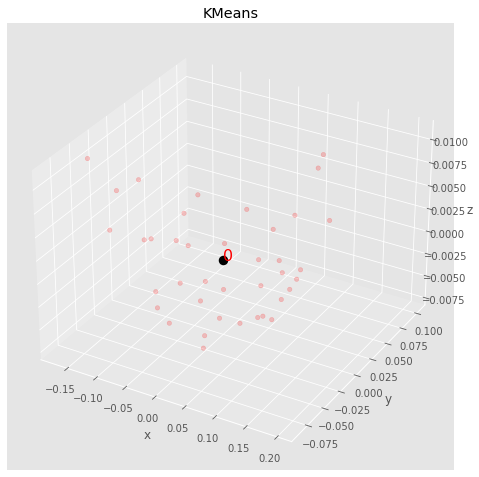

In [58]:
display3d(T, CC, model_3)

In [59]:
import math, random

from geomdl import NURBS
from geomdl import utilities
from geomdl.visualization import VisMPL

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from scipy import ndimage

%matplotlib inline

del coeffs_obj, grains_df, df

In [60]:
degrees = 3

def init_curve():
    curve = NURBS.Curve()
    curve.degree = degrees
    return curve

def get_curve_points(curve):
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    
    points = np.array(curve.evalpts)
    curve.delta = 0.01
    return curve, points

def render_curve_vis(curve):
    curve.vis = VisMPL.VisCurve2D()
    curve.render()

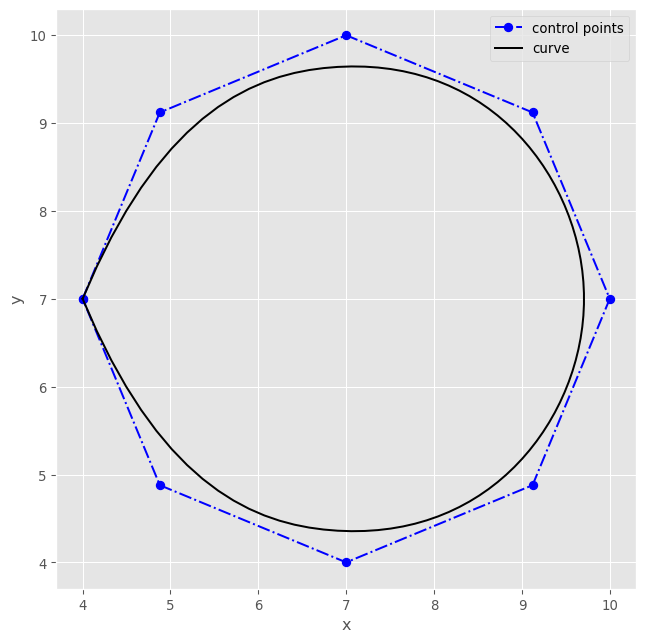

In [61]:
#alfa = 3/4; beta = np.sqrt(3) * alfa; shift = 4  ### hexagon ###
#coords =[[-beta, alfa], [-beta, -alfa], [0, -2*alfa], [beta, -alfa], 
#             [beta, alfa], [0, 2*alfa], [-beta, alfa]]
alfa = 3; beta = alfa * np.sqrt(2)/2; shift = 4  ### octagon ###
coords =[[0, alfa], [alfa-beta, alfa-beta], [alfa, 0], [alfa+beta, alfa-beta], [2*alfa, alfa],
             [alfa+beta, alfa+beta], [alfa, 2*alfa], [alfa-beta, alfa+beta], [0, alfa]]
coords.reverse()

curve = init_curve()
curve.ctrlpts = [[id[0]+shift, id[1]+shift] for id in coords]
curve, crv_points = get_curve_points(curve)

render_curve_vis(curve)

(64, 64)


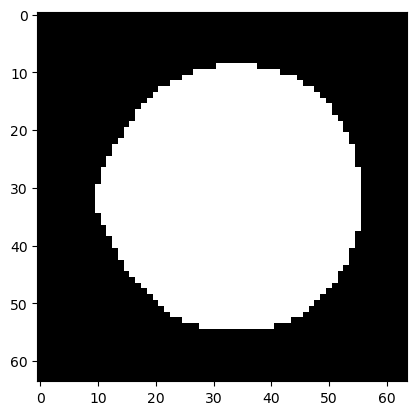

In [62]:
DPI = 16

def make_binarization(points):
    plt.rcParams.update(plt.rcParamsDefault)
    
    fig = Figure(figsize=(4, 4), dpi=DPI)
    canvas = FigureCanvasAgg(fig)
    
    ax = fig.add_subplot(111)
    ax.plot(points[:, 0], points[:, 1], color='k')
    ax.axis('off')
    
    canvas.draw()
    img = np.asarray(canvas.buffer_rgba())
    img = np.where(img < 255, 0, 1)
    img = 1 - img[:, :, 0]
    img = ndimage.binary_fill_holes(img).astype(int)
    img = ndimage.binary_opening(img, structure=struct).astype(int)
    
    return img


image = make_binarization(crv_points)

print(image.shape)

plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [63]:
pt_limit = 6   # pt_limit-1 points
x0 = curve.ctrlpts[1:pt_limit]
g_ctrlpts = curve.ctrlpts[pt_limit:]; g_ctrlpts.insert(0, curve.ctrlpts[0])


def get_xy_from_image(img):
    x = []; y = []
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == 1:
                x.append(i); y.append(j)
    
    return np.array(y), np.array(x)

def shape_functions_selection(name, obj):
    if name in ('Zeta8', 'Zeta12'):
        y, x = get_xy_from_image(obj.image)
        data = pd.DataFrame(data={'X': x, 'Y': y, 'grainId_5deg': np.zeros(y.shape)})
        return function_dict[name](obj, data)
    else:
        return function_dict[name](obj)

def return_parametrized_function(shape_coeffs_list, model_cluster_centers):
    #i = 0
    def compute_shape_coeffs_img(x):
        nonlocal shape_coeffs_list, model_cluster_centers #, i, img_tab
        curve = init_curve()
        
        tmp_ctrpts = g_ctrlpts[:]
        [tmp_ctrpts.insert(1+i, list(point)) for i, point \
                             in enumerate(zip(x.tolist()[0::2], x.tolist()[1::2]))]
        curve.ctrlpts = tmp_ctrpts
        _, crv_points = get_curve_points(curve)
        
        image = make_binarization(crv_points)
        m = measure_regionprops(image, image)[0]
        params = [np.array(i) for i in [m.area, m.perimeter, [m.centroid[0]], [m.centroid[1]], \
                                        m.major_axis_length, m.minor_axis_length, m.eccentricity, \
                                        m.equivalent_diameter, m.bbox, m.orientation]]
        coeffs_obj = ShapeCoeffsStored(*params, [0], image)
        
        im_coeffs = []
        for shape_coeff in shape_coeffs_list:
            coeff_val = shape_functions_selection(shape_coeff, coeffs_obj)
            im_coeffs.append(coeff_val)
        
        # L2 norm
        res = math.sqrt(sum([math.pow(coeff - model_cluster_centers[i], 2) for i, coeff in enumerate(im_coeffs)]))
        
        #i += 1
        #if not i%100:
        #    img_tab.append([image, res])
        
        return res
        
    return compute_shape_coeffs_img

In [64]:
from scipy.optimize import minimize

In [65]:
"""
    Phase 1 - cluster 1
"""
#img_tab = []
options  = {'ftol': 1e-10, 'disp': True, 'maxiter': 50}
method   = 'Powell'
function = return_parametrized_function(coeffs_1, model_1.cluster_centers_[0])

solution = minimize(function, x0, method=method, options=options)

Optimization terminated successfully.
         Current function value: 0.269681
         Iterations: 2
         Function evaluations: 642


In [66]:
x_solution = solution.x.tolist()
x_solution

[3.3508155927934844,
 166.04771381296342,
 5.076736451464095,
 9.999565502504177,
 9.12879085285752,
 9.047889023511232,
 9.99381966561523,
 7.181708380129976,
 9.097199013541884,
 4.87867965647589]

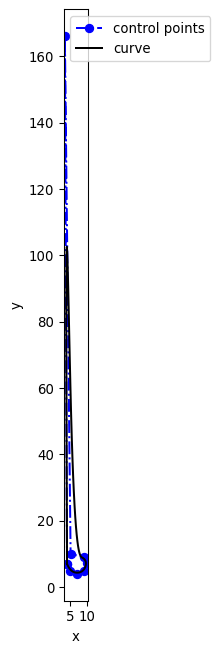

In [67]:
def fully_visualize_curve(x):
    curve = init_curve()
    ctr_ps = g_ctrlpts[:]
    [ctr_ps.insert(1+i, list(pt)) for i, pt \
                         in enumerate(zip(x[0::2], x[1::2]))]
    curve.ctrlpts = ctr_ps
    curve, crv_points = get_curve_points(curve)
    
    render_curve_vis(curve)
    
    return curve


curve = fully_visualize_curve(x_solution)

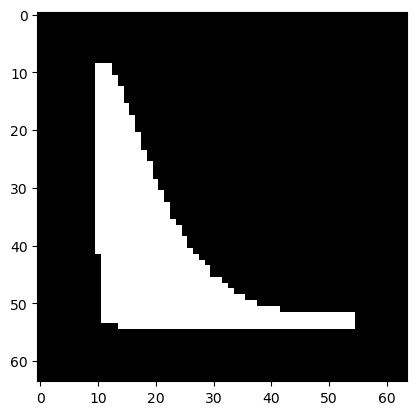

In [68]:
image_1 = make_binarization(np.array(curve.evalpts))
plt.imshow(image_1, cmap=plt.cm.gray)
plt.show()

In [69]:
"""
    Phase 2 - cluster 1
"""
#img_tab = []
function = return_parametrized_function(coeffs_2, model_2.cluster_centers_[0])

solution = minimize(function, x0, method=method, options=options)

Optimization terminated successfully.
         Current function value: 0.151425
         Iterations: 3
         Function evaluations: 918


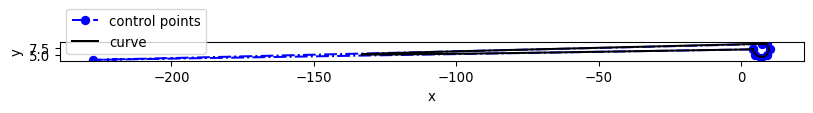

In [70]:
x_solution = solution.x.tolist()
curve = fully_visualize_curve(x_solution)

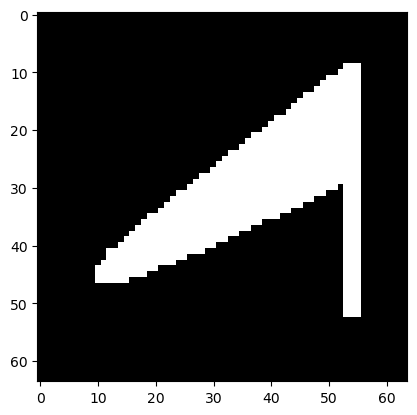

In [71]:
image_2 = make_binarization(np.array(curve.evalpts))
plt.imshow(image_2, cmap=plt.cm.gray)
plt.show()

In [72]:
"""
    Phase 3 - cluster 1
"""
#img_tab = []
function = return_parametrized_function(coeffs_3, model_3.cluster_centers_[0])

solution = minimize(function, x0, method=method, options=options)

Optimization terminated successfully.
         Current function value: 0.556507
         Iterations: 4
         Function evaluations: 1289


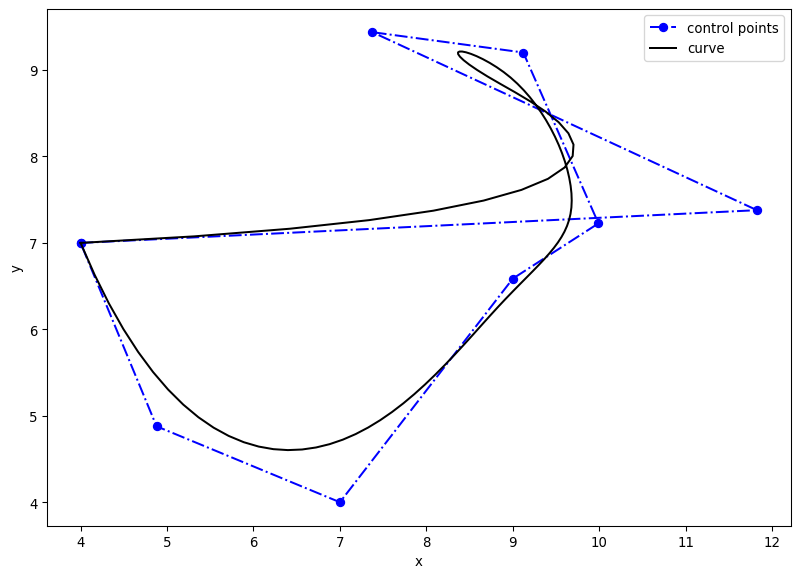

In [73]:
x_solution = solution.x.tolist()
curve = fully_visualize_curve(x_solution)

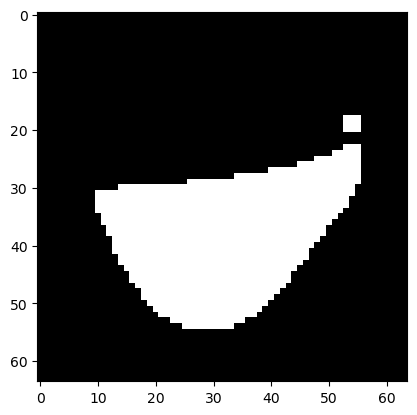

In [74]:
image_3 = make_binarization(np.array(curve.evalpts))
plt.imshow(image_3, cmap=plt.cm.gray)
plt.show()

In [75]:
del coeffs_1, model_1, coeffs_2, model_2, coeffs_3, model_3


def get_grain_image_proportion(phase_mean_area, image_area):
    result = round(phase_mean_area/image_area, 4)
    
    return result

def resize_image(array, scale_factor):
    img = Image.fromarray(np.uint8(array * 255) , 'L')
    scale = int(array.shape[0] * math.sqrt(scale_factor))
    img = img.resize((scale, scale))
    thresh_img = cv2.threshold(np.uint8(img), 5, 1, cv2.THRESH_OTSU)[1]
    
    return thresh_img

In [76]:
image_1_area = cv2.countNonZero(image_1)
image_2_area = cv2.countNonZero(image_2)
image_3_area = cv2.countNonZero(image_3)

print('Phases: 1   2   3')
print('Mean areas:', image_1_area, image_2_area, image_3_area)

proportion_1 = get_grain_image_proportion(phase_1_mean_area, image_1_area)
proportion_2 = get_grain_image_proportion(phase_2_mean_area, image_2_area)
proportion_3 = get_grain_image_proportion(phase_3_mean_area, image_3_area)

print('Proportions:', proportion_1, proportion_2, proportion_3)

Phases: 1   2   3
Mean areas: 663 718 886
Proportions: 0.0143 0.2041 1.3848


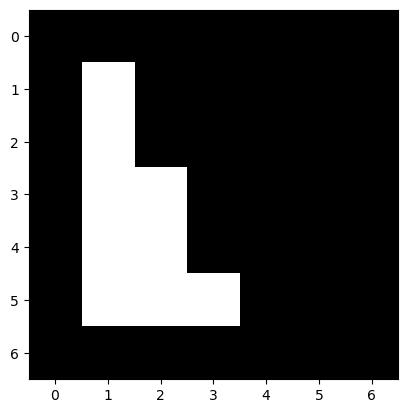

In [77]:
image_1 = resize_image(image_1, proportion_1)
plt.imshow(image_1, cmap=plt.cm.gray)
plt.show()

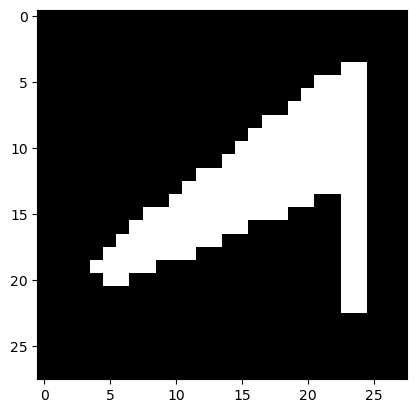

In [78]:
image_2 = resize_image(image_2, proportion_2)
plt.imshow(image_2, cmap=plt.cm.gray)
plt.show()

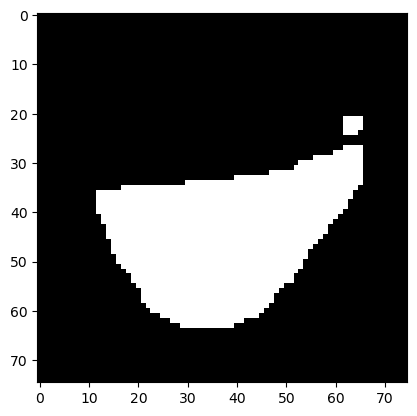

In [79]:
image_3 = resize_image(image_3, proportion_3)
plt.imshow(image_3, cmap=plt.cm.gray)
plt.show()

In [80]:
total_phase_area = sum([phase_1_area, phase_2_area, phase_3_area])
phase_1_percentage = round(phase_1_area/total_phase_area, 3)
phase_2_percentage = round(phase_2_area/total_phase_area, 3)
phase_3_percentage = round(phase_3_area/total_phase_area, 3)

phase_1_grains_amount = int(round(phase_1_area_after/phase_1_mean_area))
phase_2_grains_amount = int(round(phase_2_area_after/phase_2_mean_area))
phase_3_grains_amount = int(round(phase_3_area_after/phase_3_mean_area))

print("Phase 1 area:", phase_1_area, "Phase 2 area:", phase_2_area, "Phase 3 area:", phase_3_area)
print("In summary: ", total_phase_area)
print("Part-per-thousand: ", phase_1_percentage, phase_2_percentage, phase_3_percentage)
print("Number of grains: ", phase_1_grains_amount, phase_2_grains_amount, phase_3_grains_amount, "(checkout)")

Phase 1 area: 4168 Phase 2 area: 316118 Phase 3 area: 338316
In summary:  658602
Part-per-thousand:  0.006 0.48 0.514
Number of grains:  97 895 39 (checkout)


In [81]:
def add_channel_to_image(img, number):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    new_img = np.zeros(rgb_img.shape)
    cell = np.zeros((3)); cell[number] = 255
    
    new_img[[rgb_img[:,:,number] == 1]] = cell
    
    return np.uint8(new_img)


image_1 = add_channel_to_image(image_1, 0)
image_2 = add_channel_to_image(image_2, 1)
image_3 = add_channel_to_image(image_3, 2)

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


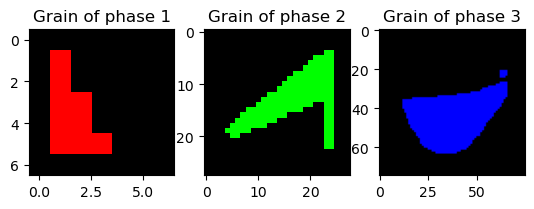

In [82]:
fig = plt.figure()

fig.add_subplot(131)
plt.imshow(image_1, cmap=cmap)
plt.title('Grain of phase 1')
fig.add_subplot(132)
plt.imshow(image_2, cmap=cmap)
plt.title('Grain of phase 2')
fig.add_subplot(133)
plt.imshow(image_3, cmap=cmap)
plt.title('Grain of phase 3')

plt.show()

In [83]:
def overlay_image(img, img_overlay, x, y):
    """
        Function inspired by stackoverflow: 
    https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv/45118011
    """
    # Image & overlay ranges
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])
    
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)
    
    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return
    
    # Blend overlay within the determined ranges
    for c in range(3):
        if c == background:
            continue
        else:
            img[y1:y2, x1:x2, c] = np.where(img_overlay[y1o:y2o, x1o:x2o, c] > 0, \
                                            img_overlay[y1o:y2o, x1o:x2o, c], img[y1:y2, x1:x2, c])
            img[y1:y2, x1:x2, background] = np.where(img_overlay[y1o:y2o, x1o:x2o, c] > 0, \
                                                     np.zeros(img_overlay[y1o:y2o, x1o:x2o, c].shape), \
                                                     img[y1:y2, x1:x2, background])


In [84]:
# taking ferrit as background
background = 2  # blue = ferrit
lenght = 50
dims = list((lenght,lenght)); dims.append(3)
new_image = np.uint8(np.zeros(dims))
new_image[:,:,background] = 255

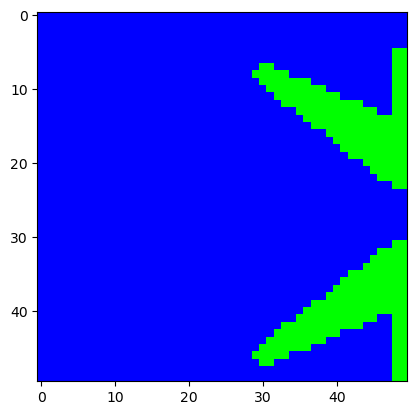

In [85]:
if flag:
    overlay_image(new_image, np.flipud(image_2), int(lenght/2), 0)
    overlay_image(new_image, image_2, int(lenght/2), int(lenght/2)+2)
else:
    overlay_image(new_image, np.flipud(image_2), int(lenght/2), -6)
    overlay_image(new_image, image_2, int(lenght/2), int(lenght/2)+2)

plt.imshow(new_image, cmap=cmap)
plt.show()

In [86]:
image_2v2 = image_2.copy()

if flag:
    tmp = resize_image(image_2v2[:,:,1], 0.5)
else:
    tmp = resize_image(image_2v2[:,:,1], 1.1)
tmp = add_channel_to_image(tmp, 1)
tmp = np.fliplr(np.flipud(tmp))

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


In [87]:
print('Before:', cv2.countNonZero(image_2v2[:,:,1]), cv2.countNonZero(tmp[:,:,1]))
if flag:
    overlay_image(image_2v2, tmp, 2, 2)
else:
    overlay_image(image_2v2, tmp, 0, -4)
print('After:', cv2.countNonZero(image_2v2[:,:,1]))

Before: 153 72
After: 219


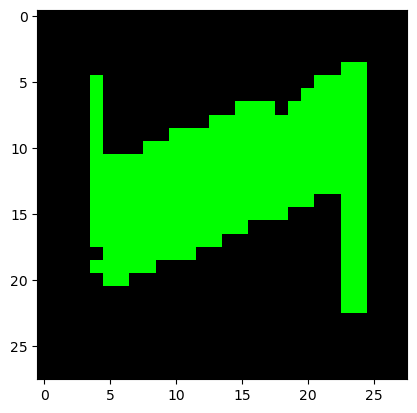

In [88]:
plt.imshow(image_2v2, cmap=cmap)
plt.show()

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


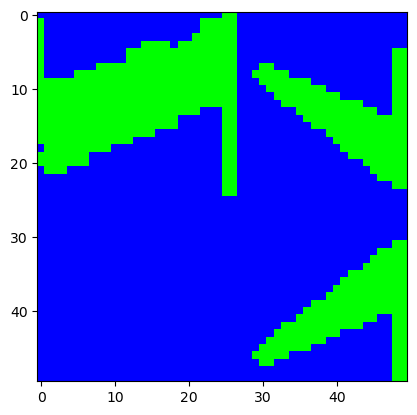

In [89]:
if flag:
    image_2v2 = resize_image(image_2v2[:,:,1], 1.7)
    image_2v2 = add_channel_to_image(image_2v2, 1)
    overlay_image(new_image, image_2v2, -5, -5)
else:
    image_2v2 = resize_image(image_2v2[:,:,1], 1.6)
    image_2v2 = add_channel_to_image(image_2v2, 1)
    overlay_image(new_image, image_2v2, 0, -6)

plt.imshow(new_image, cmap=cmap)
plt.show()

In [90]:
image_2v3 = np.zeros((image_2.shape[0], image_2.shape[1]*2, 3))

tmp = np.flipud(image_2.copy())

if flag:
    tmp = resize_image(tmp[:,:,1], 2)
    tmp = add_channel_to_image(tmp, 1)
    overlay_image(image_2v3, tmp, -6, -6)
    tmp = np.fliplr(tmp)
    overlay_image(image_2v3, tmp, 24, -6)
else:
    tmp = resize_image(tmp[:,:,1], 2.5)
    tmp = add_channel_to_image(tmp, 1)
    overlay_image(image_2v3, tmp, -6, -6)
    tmp = np.fliplr(tmp)
    overlay_image(image_2v3, tmp, 23, -6)

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


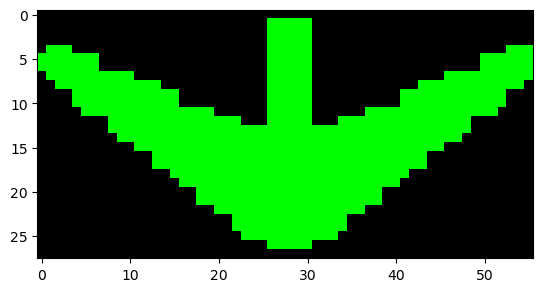

In [91]:
plt.imshow(image_2v3, cmap=cmap)
plt.show()

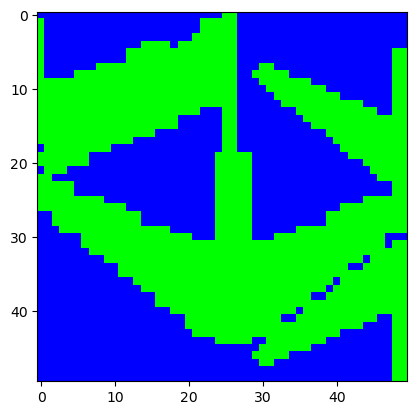

In [92]:
if flag:
    overlay_image(new_image, image_2v3, -2, 18)
else:
    overlay_image(new_image, image_2v3, -6, 16)

plt.imshow(new_image, cmap=cmap)
plt.show()

In [93]:
image_1v2 = image_1.copy()
image_1v2 = resize_image(image_1v2[:,:,0], 1.5)
image_1v2 = add_channel_to_image(image_1v2, 0)
if flag:
    overlay_image(new_image, image_1v2, 22, 43)
else:
    overlay_image(new_image, image_1v2, 23, 44)

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_60598/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


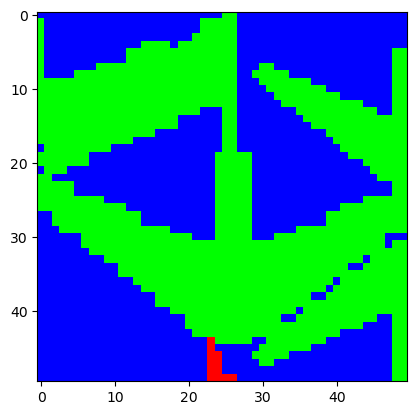

In [94]:
plt.imshow(new_image, cmap=cmap)
plt.show()

In [95]:
image_area = new_image.shape[0] * new_image.shape[1]
phase_1_percentage = round(cv2.countNonZero(new_image[:,:,0]) / image_area, 3)
phase_2_percentage = round(cv2.countNonZero(new_image[:,:,1]) / image_area, 3)
phase_3_percentage = round(cv2.countNonZero(new_image[:,:,2]) / image_area, 3)

print("Part-per-thousand: ", phase_1_percentage, phase_2_percentage, phase_3_percentage)

Part-per-thousand:  0.005 0.478 0.517


In [96]:
def match_if_border(img, x, y): # in fact x is y, y is x
    if x-1 >= 0 and y-1 >= 0 and (img[x-1,y-1,0] != 0 or img[x-1,y-1,2] != 0):
        return True
    if y-1 >= 0 and (img[x,y-1,0] != 0 or img[x,y-1,2] != 0):
        return True
    if x+1 < img.shape[0] and y-1 > 0 and (img[x+1,y-1,0] != 0 or img[x+1,y-1,2] != 0):
        return True
    if x+1 < img.shape[0] and (img[x+1,y,0] != 0 or img[x+1,y,2] != 0):
        return True
    if x+1 < img.shape[0] and y+1 < img.shape[1] and (img[x+1,y+1,0] != 0 or img[x+1,y+1,2] != 0):
        return True
    if y+1 < img.shape[1] and (img[x,y+1,0] != 0 or img[x,y+1,2] != 0):
        return True
    if x-1 >= 0 and y+1 < img.shape[1] and (img[x-1,y+1,0] != 0 or img[x-1,y+1,2] != 0):
        return True
    if x-1 >= 0 and (img[x-1,y,0] != 0 or img[x-1,y,2] != 0):
        return True
    if x-1 < 0 or y-1 < 0 or x+1 == img.shape[0] or y+1 == img.shape[1]:
        return True
    else:
        return False

def match_border_as_black(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j,1] == 255 and match_if_border(image, i, j):
                image[i,j,1] = 0

In [97]:
new_image_border = new_image.copy()
match_border_as_black(new_image_border)

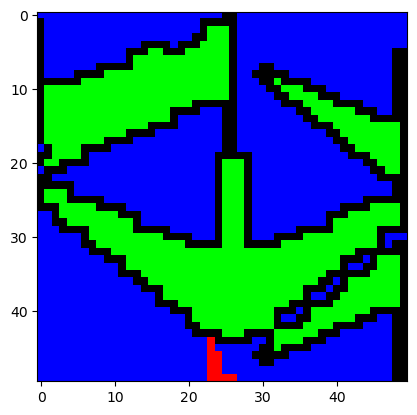

In [98]:
plt.imshow(new_image_border, cmap=cmap)
plt.show()

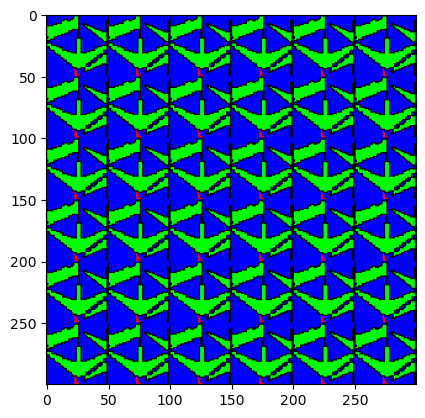

In [99]:
n_dims = 6
multiplied_new_image = np.tile(new_image_border, (n_dims,n_dims,1))

plt.imshow(multiplied_new_image, cmap=cmap)
plt.show()

In [100]:
# for extra work
def multi_visualize(rows_num, cols_num):
    fig, ax = plt.subplots(rows_num, cols_num, sharex='col', sharey='row')
    
    for i in range(rows_num):
        for j in range(cols_num):
            tab_inx = i * cols_num + j
            
            if tab_inx == len(img_tab):
                break
            
            ax[i, j].imshow(img_tab[tab_inx][0], cmap=plt.cm.gray)
            ax[i, j].set_title(str(round(img_tab[tab_inx][1], 9)), fontsize=6)
    
    plt.show()


#cols_num = 5
#rows_num = math.ceil(len(img_tab)/cols_num)

#multi_visualize(rows_num, cols_num)